# Data Preparation

Dataset: <a href="https://www.kaggle.com/yasserh/wine-quality-dataset">Wine Quality</a><br>
Filename: WineQT.csv


## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
# Set Options for display
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from scipy.stats import norm
from scipy import stats

________

# Part 1 - All Features

## Load the Dataset
* Specify the Parameters (Filepath, Index Column)
* Check for Date-Time Columns to Parse Dates
* Check Encoding if file does not load correctly

In [5]:
df = pd.read_csv("./WineQT.csv")

View the Dataset

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,1
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,2
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,3
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,4


Check the Shape

In [7]:
df.shape

(1143, 13)

Set the correct index

In [8]:
df.set_index('Id', inplace=True)

## Ensure Columns / Features have Proper Labels

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
correct_col_names = []

# REPLACING SPACE WITH _ FOR PROPER LABEL
for col_name in df.columns:
    splitted_name = col_name.split(' ')
    if len(splitted_name) == 1:
        correct_col_names.append(col_name)
    else:
        joined_name = '_'.join(splitted_name)
        correct_col_names.append(joined_name)

# REASSIGN COLUMN HEADERS
df.columns = correct_col_names

## Ensure Correct Format of Values

In [14]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Remove Duplicates

Check if Index is duplicated

In [15]:
df.index.duplicated().sum()

0

Check if there are duplicated rows


In [16]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5
65,7.20,0.72,0.05,4.65,0.09,4.00,11.00,1.00,3.41,0.39,10.90,5
91,8.60,0.49,0.28,1.90,0.11,20.00,136.00,1.00,2.93,1.95,9.90,6
93,7.70,0.49,0.26,1.90,0.06,9.00,31.00,1.00,3.39,0.64,9.60,5
102,8.10,0.55,0.18,1.90,0.08,13.00,35.00,1.00,3.30,0.59,9.00,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,7.50,0.38,0.57,2.30,0.11,5.00,12.00,1.00,3.36,0.55,11.40,6
1560,7.80,0.60,0.26,2.00,0.08,31.00,131.00,1.00,3.21,0.52,9.90,5
1561,7.80,0.60,0.26,2.00,0.08,31.00,131.00,1.00,3.21,0.52,9.90,5


Remove the duplicates if any

In [17]:
df.drop_duplicates(inplace=True)

## Handle Missing Data

Check for missing data

In [18]:
#Gets the total number of missing data
total = df.isnull().sum().sort_values(ascending=False)


In [19]:
#Get % of Null
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

In [20]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(20)

,Total,Percent
fixed_acidity,0,0.00
volatile_acidity,0,0.00
citric_acid,0,0.00
residual_sugar,0,0.00
chlorides,0,0.00
free_sulfur_dioxide,0,0.00
total_sulfur_dioxide,0,0.00
density,0,0.00
pH,0,0.00
sulphates,0,0.00


In [21]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00,1018.00
mean,8.29,0.53,0.27,2.52,0.09,15.65,46.33,1.00,3.31,0.66,10.45,5.64
std,1.74,0.18,0.20,1.31,0.05,10.18,33.12,0.00,0.16,0.17,1.10,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.10,0.65,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.72,11.20,6.00
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00


In [22]:
df.shape

(1018, 12)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

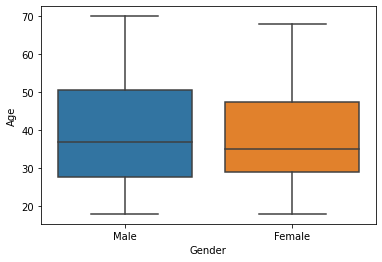

In [61]:
sns.boxplot('Gender','Age', data=df)

In [62]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


## Split into Numerical, Categorical, and Target

In [63]:
#categorical
df_cat = df.select_dtypes(include=['object'])

#numerical
df_num = df.select_dtypes(include=['int64', 'float64'])

#target
df_target = df['Spending_Score']

## Check the Distribution of the Target Variable

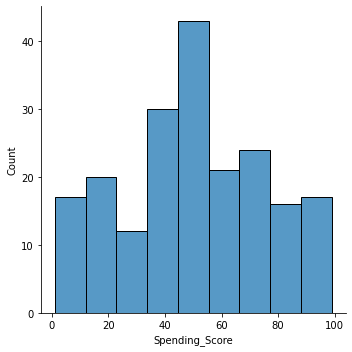

In [64]:
sns.displot(df_num['Spending_Score'])

<AxesSubplot:xlabel='Spending_Score'>

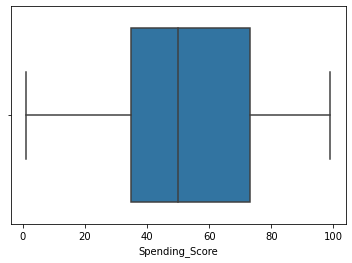

In [65]:
sns.boxplot(df_num['Spending_Score'])

In [66]:
df_num

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


In [67]:
df_cat

,Gender
CustomerID,
1,Male
2,Male
3,Female
4,Female
5,Female
...,...
196,Female
197,Female
198,Male


_______

# Part 2 - Numerical Features

Get the statistics for numerical data

In [68]:
df_num

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


Analyze the following features:
1. Age
    1. Get Value Counts
2. Annual_Income
    1. Plot the distribution
    2. Create a Boxplot
3. Spending_Score
    1. Plot the distribution
    2. Create a Boxplot

*For now, do not remove any outliers*

In [70]:
#1 Age
df_num['Age'].value_counts()

32    11
35     9
31     8
19     8
30     7
49     7
40     6
38     6
36     6
47     6
23     6
27     6
20     5
48     5
21     5
34     5
50     5
29     5
28     4
24     4
54     4
67     4
59     4
18     4
68     3
60     3
46     3
43     3
45     3
22     3
25     3
39     3
37     3
33     3
58     2
66     2
65     2
63     2
26     2
57     2
44     2
53     2
52     2
51     2
41     2
42     2
70     2
56     1
55     1
64     1
69     1
Name: Age, dtype: int64

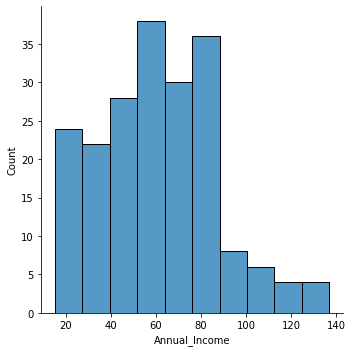

In [73]:
#2 Annual_Income
sns.displot(df_num['Annual_Income'])

<AxesSubplot:xlabel='Annual_Income'>

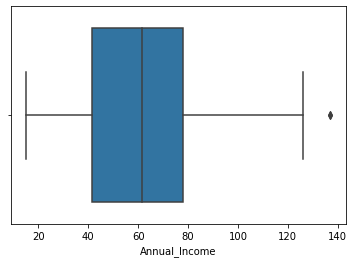

In [74]:
sns.boxplot(df_num['Annual_Income'])

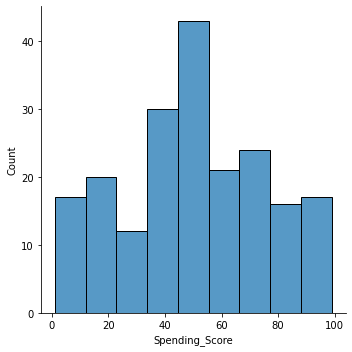

In [76]:
#3 Spending_Score
sns.displot(df_num['Spending_Score'])

<AxesSubplot:xlabel='Spending_Score'>

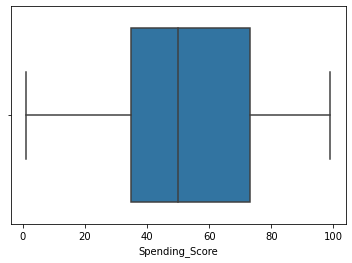

In [75]:
sns.boxplot(df_num['Spending_Score'])

## Feature Scaling 

Check Scale of Features

In [77]:
df_num.describe()

,Age,Annual_Income,Spending_Score
count,200.00,200.00,200.00
mean,38.85,60.56,50.20
std,13.97,26.26,25.82
min,18.00,15.00,1.00
25%,28.75,41.50,34.75
50%,36.00,61.50,50.00
75%,49.00,78.00,73.00
max,70.00,137.00,99.00


In [78]:
from sklearn.preprocessing import MinMaxScaler

Use the MinMax Scaler to scale the numerical features

In [79]:
scaler = MinMaxScaler()

In [80]:
scaled_values = scaler.fit_transform(df_num)

df_num_scaled = pd.DataFrame(scaled_values, columns=df_num.columns, index=df_num.index)

In [81]:
df_num_scaled.head()

,Age,Annual_Income,Spending_Score
CustomerID,,,
1,0.02,0.00,0.39
2,0.06,0.00,0.82
3,0.04,0.01,0.05
4,0.10,0.01,0.78
5,0.25,0.02,0.40


______

# Part 3 - Categorical Features

Get the statistics for the categorical features

In [82]:
df_cat

,Gender
CustomerID,
1,Male
2,Male
3,Female
4,Female
5,Female
...,...
196,Female
197,Female
198,Male


Print categorical values for each feature

In [83]:
df_cat['Gender'].value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

Convert Categories to Number 

In [84]:
df_cat = df.select_dtypes(include=['object'])

In [85]:
df_cat.head()

,Gender
CustomerID,
1,Male
2,Male
3,Female
4,Female
5,Female


In [89]:
df_cat.columns

Index(['Gender'], dtype='object')

In [93]:
print(df_cat.columns)
for cat_col in list(df_cat.columns):
    print(df_cat_ord['Gender'].value_counts())

Index(['Gender'], dtype='object')
Female    112
Male       88
Name: Gender, dtype: int64


In [100]:
#convert original categories to number, add to the original dataframe
df_cat['Gender_num'] = 0
df_cat.loc[(df_cat['Gender'] == 'Male'), 'Gender_num'] = 1
df_cat.loc[(df_cat['Gender'] == 'Female'), 'Gender_num'] = 2

In [101]:
df_cat

,Gender,Gender_num
CustomerID,,
1,Male,1
2,Male,1
3,Female,2
4,Female,2
5,Female,2
...,...,...
196,Female,2
197,Female,2
198,Male,1


_______

# Combine all the prepared dataframes

In [105]:
df_list = [df_num_scaled, df_cat, df_target]

df_final = pd.concat(df_list, axis = 1)

In [106]:
df_final.head()

,Age,Annual_Income,Spending_Score,Gender,Gender_num,Spending_Score
CustomerID,,,,,,
1,0.02,0.00,0.39,Male,1,39
2,0.06,0.00,0.82,Male,1,81
3,0.04,0.01,0.05,Female,2,6
4,0.10,0.01,0.78,Female,2,77
5,0.25,0.02,0.40,Female,2,40


In [108]:
df_final.columns

Index(['Age', 'Annual_Income', 'Spending_Score', 'Gender', 'Gender_num',
       'Spending_Score'],
      dtype='object')

In [109]:
df_final.shape

(200, 6)

## Save final DataFrame as a csv file

In [266]:
df_final.to_csv('./Output/c2_titanic_Output1.csv')

### Check if it loads correctly

In [267]:
df_check = pd.read_csv('./Output/c2_titanic_Output1.csv', index_col='PassengerId')

In [268]:
df_check.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_num,Sex_num,Fare.1
PassengerId,,,,,,,,,,
0.00,0,0.00,1.00,0.27,0.12,0.00,0.01,2,2,7.25
0.00,1,1.00,0.00,0.47,0.12,0.00,0.14,3,3,71.28
0.00,2,1.00,1.00,0.32,0.00,0.00,0.02,2,3,7.92
0.00,3,1.00,0.00,0.43,0.12,0.00,0.10,2,3,53.10
0.00,4,0.00,1.00,0.43,0.00,0.00,0.02,2,2,8.05
